# Pole and Zero

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/RIPES-ACROSS/Control-System-Design-and-Application/blob/master/4_Pole_Zero/pole_zero.ipynb)

## 制御および代数計算モジュールのインストール

- https://python-control.readthedocs.io/en/0.9.0/index.html
- https://www.sympy.org/en/index.html

In [1]:
!pip install control sympy

## モジュールの読込

In [2]:
from pylab import *
import control.matlab as matlab
import sympy
import math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

##　本日対象とするモデル

\begin{align}
sys1 = \frac{700}{(s+15)(s^2+4s+100)}\\
sys2 = \frac{360}{(s+4)(s^2+2s+90)}
\end{align}

課題:上記システムの分母多項式を$s$について解き，極を図示せよ．

## Controlモジュールによるsの解き方と図示

In [3]:
s_matlab = matlab.TransferFunction.s

In [4]:
sys_matlab_list = []
sys_matlab_list.append(700/((s_matlab+15)*(s_matlab**2 + 4*s_matlab + 100)))
sys_matlab_list.append(360/((s_matlab+4)*(s_matlab**2 + 2*s_matlab + 90)))

TransferFunction(array([700]), array([   1,   19,  160, 1500]))

array([-15.+0.j        ,  -2.+9.79795897j,  -2.-9.79795897j])

array([], dtype=float64)

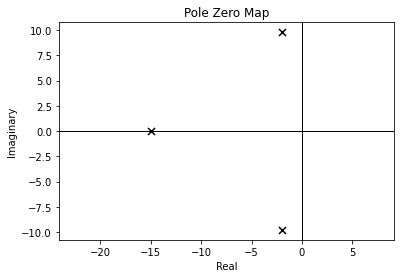

TransferFunction(array([360]), array([  1,   6,  98, 360]))

array([-1.+9.43398113j, -1.-9.43398113j, -4.+0.j        ])

array([], dtype=float64)

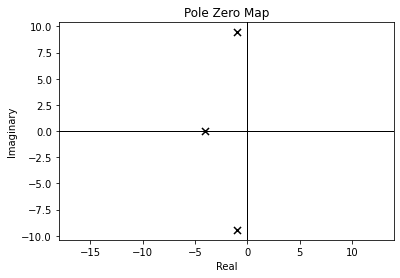

In [5]:
for sys in sys_matlab_list:
    display(sys)
    display(matlab.pole(sys), matlab.zero(sys))
    matlab.pzmap(sys)
    plt.show()

### Matplotlibを用いて異なるシステムの極を重ねて表示する

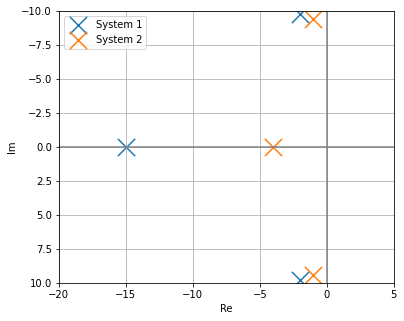

In [6]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)

plt.plot(np.arange(-20, 20), [0]*len(np.arange(-20, 20)), color='gray')
plt.plot([0]*len(np.arange(-20, 20)), np.arange(-20, 20), color='gray')

for i, sys in enumerate(sys_matlab_list):
    plt.scatter(matlab.pole(sys).real, matlab.pole(sys).imag, 
                marker='x', s=300, label=f'System {i+1}')
plt.xlabel('Re')
plt.ylabel('Im')
plt.xlim(-20, 5)
plt.ylim(10, -10)
plt.legend()
plt.grid()
plt.show()

### ステップ応答の可視化

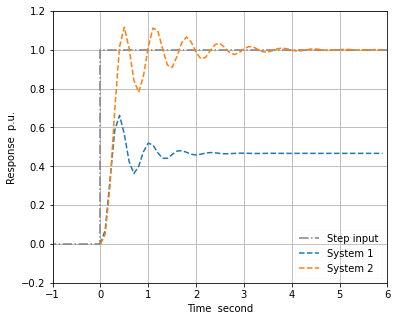

In [7]:
TIME_MAX = 6

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1)
plt.plot(list(np.arange(-10, 0+1))+list(np.arange(1, 10+1)), 
         [0]*len(np.arange(-10, 0+1))+[1]*len(np.arange(1, 10+1)), 
         '-.', color='gray', drawstyle='steps-pre', label='Step input')
for i, sys in enumerate(sys_matlab_list):
    output, time_list = matlab.step(sys, arange(0, TIME_MAX, 0.1))
    
    plt.plot(time_list, output, '--',
             label=f'System {i+1}')

plt.xlim(-1, TIME_MAX)
plt.ylim(-0.2, 1.2)
plt.xlabel('Time  second')
plt.ylabel('Response  p.u.')
plt.grid()
plt.legend(framealpha=0.1)
plt.show()

In [8]:
[0]*len(np.arange(-10, 0))+[1]*len(np.arange(0, 10))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

## Sympyモジュールによる分母多項式のsについて解き方

In [9]:
s_sympy = sympy.Symbol('s')

In [10]:
eq_sympy_list = []
eq_sympy_list.append((s_sympy+15)*(s_sympy**2 + 4*s_sympy + 100))
eq_sympy_list.append((s_sympy+4)*(s_sympy**2 + 2*s_sympy + 90))

In [11]:
sympy.Eq((s_sympy+15)*(s_sympy**2 + 4*s_sympy + 100), 0)

Eq((s + 15)*(s**2 + 4*s + 100), 0)

In [12]:
for eq in eq_sympy_list:
    display(eq)
    s_ans = sympy.solve(eq, s_sympy)
    display(s_ans)

(s + 15)*(s**2 + 4*s + 100)

[-15, -2 - 4*sqrt(6)*I, -2 + 4*sqrt(6)*I]

(s + 4)*(s**2 + 2*s + 90)

[-4, -1 - sqrt(89)*I, -1 + sqrt(89)*I]

### 平方根の中身を計算しておく

In [13]:
4.0*math.sqrt(6), math.sqrt(89)

(9.797958971132712, 9.433981132056603)

Sympyを用いる場合の注意: 分子多項式にsが存在する場合は，「分子多項式=0」も立式する必要がある．